In [129]:
from sklearn.cluster import KMeans
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df.isnull().values.any()

False

In [8]:
km = KMeans(n_clusters=3)

In [16]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [17]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [31]:
km.inertia_

1577046058.883117

In [25]:
df['clusters'] = y_pred

In [28]:
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<AxesSubplot:xlabel='Age'>

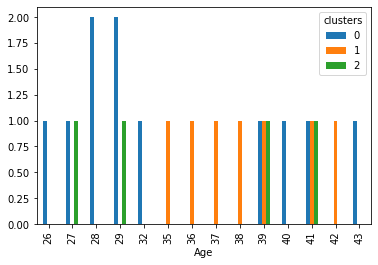

In [30]:
pd.crosstab(df.Age, df.clusters).plot(kind='bar')

Text(0, 0.5, 'Income($)')

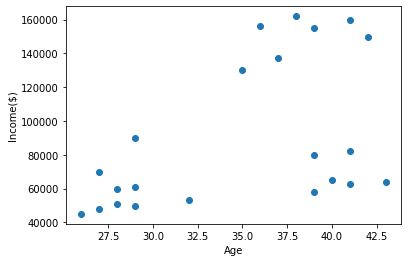

In [19]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [21]:
centers = km.cluster_centers_
centers

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

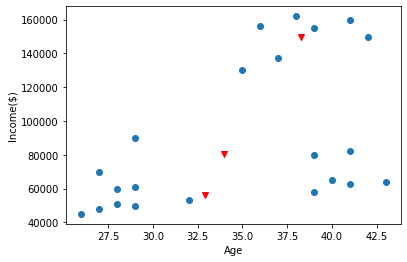

In [24]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(centers[:,0], centers[:,1], color='red', marker='v')

In [51]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [50]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [68]:
df.Age.any()<0

False

In [58]:
k_list = []
rng = range(1,10)
for i in rng :
    km = KMeans(n_clusters= i)
    km.fit_predict(df[['Age','Income($)']])
    k_list.append(km.inertia_)

In [59]:
k_list

[5.060710915382196,
 0.6281607665690713,
 0.3112456747404844,
 0.18044982698961948,
 0.11124567474048448,
 0.06274509803921574,
 0.04059976931949242,
 0.02848904267589389,
 0.021914648212225947]

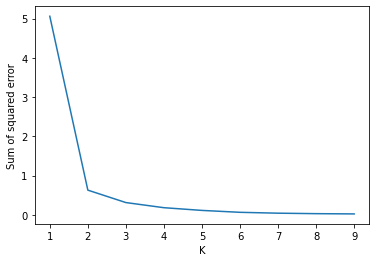

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(rng,k_list)

In [121]:
from sklearn.datasets import load_iris
iris = load_iris()

In [122]:
iris.feature_names
dff = pd.DataFrame(iris.data, columns=iris.feature_names)
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [156]:
mn = KMeans(n_clusters=3)

In [157]:
mn.fit_predict(dff[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [158]:
cl_center = mn.cluster_centers_
cl_center

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [159]:
dff['clusters'] = mn.fit_predict(iris.data, iris.target)

In [160]:
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,0
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [161]:
scaler = MinMaxScaler()
dff['sepal length (cm)'] = scaler.fit_transform(dff[['sepal length (cm)']])

scaler = MinMaxScaler()
dff['sepal width (cm)'] = scaler.fit_transform(dff[['sepal width (cm)']])

scaler = MinMaxScaler()
dff['petal length (cm)'] = scaler.fit_transform(dff[['petal length (cm)']])

scaler = MinMaxScaler()
dff['petal width (cm)'] = scaler.fit_transform(dff[['petal width (cm)']])

In [162]:
dff.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [168]:
df1 = dff[dff.clusters==0]
df2 = dff[dff.clusters==1]
df3 = dff[dff.clusters==2]

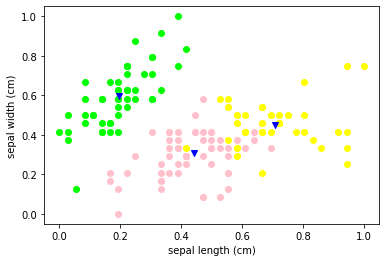

In [176]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='pink')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='lime')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(cl_center[:,0], cl_center[:,1], color='blue', marker='v')

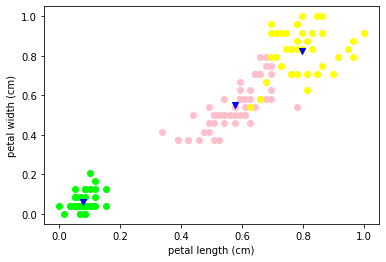

In [175]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='pink')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='lime')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(cl_center[:,2], cl_center[:,3], color='blue', marker='v')

In [165]:
k_lists = []
rang = range(1,10)
for i in rang :
    km = KMeans(n_clusters= i)
    km.fit_predict(iris.data, iris.target)
    k_lists.append(km.inertia_)

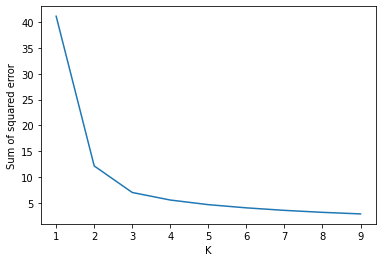

In [166]:
%matplotlib inline
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(rang,k_lists)